# Regularization in Machine Learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #4

This colaboratory also contains Homework #4 of the Machine Learning course, which is due **April 16, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

In [79]:
import pandas as pd
import numpy as np

import os

import warnings
warnings.filterwarnings('ignore') #does not really work anyway :)


# Regularisation 

## Simple linear regression vs ridge regression and lasso regression. 

Toy 2D example returns to help us with regularisation

In [4]:
# Note that distance and fare_amount were substituted with `x` and `y` for simplification
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [5]:
# Cannot live without plotnine :)
!pip install plotnine
from plotnine import *

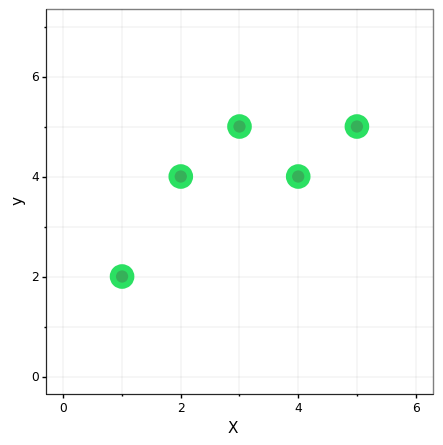

<ggplot: (8780892892655)>

In [6]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig # I know, I am super good at making long code short...

**Classroom exercise**: find value of **`intercept`**,  using precalculated **`slope`** (`w1`) and the equation of the line (`y = intercept + slope*x`).

In [7]:
##### YOUR CODE STARTS #####
w1 = (np.sum((example_data.x - example_data.x.mean())*((example_data.y - example_data.y.mean()))))
w1 = w1/(np.sum((example_data.x - example_data.x.mean())**2))
intercept = example_data.y.mean() - w1*example_data.x.mean()
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {w1}; intercept = {intercept}, while the correct values are w1 = 0.6 and intercept = 2.2")

w1 = 0.6; intercept = 2.2, while the correct values are w1 = 0.6 and intercept = 2.2


Let's visualise this regression line:

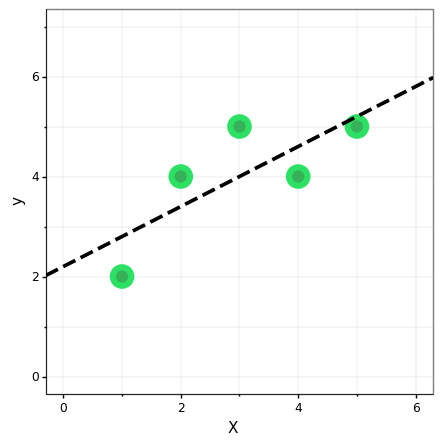

<ggplot: (8780892920668)>

In [8]:
fig = fig + geom_abline(intercept = intercept, slope = w1, color="black", linetype="dashed", size=1.5)
fig

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Initialising all three regression models
lr = LinearRegression()

lambd = 1
##### YOUR CODE STARTS #####
# Ridge regression
lr_ridge = Ridge() # L2 regularisation + Linear Regression

# Lasso 
lr_lasso = Lasso() # L1 regularisation + Linear Regression
##### YOUR CODE ENDS ##### (please do not delete this line)

In [10]:
lr.fit(example_data[['x']], example_data[['y']])

##### YOUR CODE STARTS #####
lr_ridge.fit(example_data[['x']], example_data[['y']])
lr_lasso.fit(example_data[['x']], example_data[['y']])
##### YOUR CODE ENDS ##### (please do not delete this line)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

How to list all attributes of the object in Python? Let's remind ourselves names of attributes that store weights and intercept of the model.

In [11]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

Let's print our weights and intercepts for each model:

In [12]:
##### YOUR CODE STARTS #####
print(f'Sklearn Linear regression w1 is {lr.coef_} and intercept is {lr.intercept_}')
print(f'Sklearn Ridge regression w1 is {lr_ridge.coef_} and intercept is {lr_ridge.intercept_}')
print(f'Sklearn Lasso regression w1 is {lr_lasso.coef_} and intercept is {lr_lasso.intercept_}')
##### YOUR CODE ENDS ##### (please do not delete this line)

Sklearn Linear regression w1 is [[0.6]] and intercept is [2.2]
Sklearn Ridge regression w1 is [[0.54545455]] and intercept is [2.36363636]
Sklearn Lasso regression w1 is [0.1] and intercept is [3.7]


Now we can add **Ridge** and **LASSO** regression to our figure (no need to baseline linear regression, as it is the same as the manually calculated one):

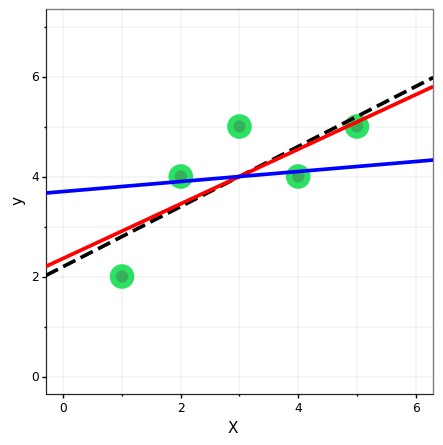

<ggplot: (-9223363256023554230)>

In [13]:
fig = fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1.5)
fig = fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1.5)
fig

This was way too easy. Let's add more features to our toy example by producing multiple polynomials form the original distance.

In [14]:
example_data['x^2'] = example_data.x**2
example_data['x^3']= example_data.x**3
example_data['x^4'] = example_data.x**4

In [15]:
example_data

,x,y,x^2,x^3,x^4
0,1,2,1,1,1
1,2,4,4,8,16
2,3,5,9,27,81
3,4,4,16,64,256
4,5,5,25,125,625


In [16]:
lr = LinearRegression()

# Regularization strength
lambd = 1

# Ridge regression (L2)
lr_ridge = Ridge(lambd)

# Lasso regression (L1)
lr_lasso = Lasso(lambd)

Here we should use new features to fit all three models:

In [17]:
##### YOUR CODE STARTS #####
lr.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_lasso.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
##### YOUR CODE ENDS ##### (please do not delete this line)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Printing out resulting coefficients, what can you notice?

In [18]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression, forces coefficients to be small: [{lr_ridge.coef_}, {round(lr_ridge.intercept_[0], 8)}]')
print(f'Lasso regression, acts as a feature selection: [{lr_lasso.coef_}, {round(lr_lasso.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression, forces coefficients to be small: [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Lasso regression, acts as a feature selection: [[ 0.          0.          0.05608653 -0.00829621], 3.1005046]


To visualise the resulting trends (these are not lines now, buy polynomial splines) we need a syntheticc test set.

In [19]:
test_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61),
                          'x^2': np.linspace(start=0, stop=6, num=61)**2,
                          'x^3': np.linspace(start=0, stop=6, num=61)**3,
                          'x^4': np.linspace(start=0, stop=6, num=61)**4})

test_data.head()

,x,x^2,x^3,x^4
0,0.0,0.00,0.000,0.0000
1,0.1,0.01,0.001,0.0001
2,0.2,0.04,0.008,0.0016
3,0.3,0.09,0.027,0.0081
4,0.4,0.16,0.064,0.0256


Use function `predict` to produce additional columns for each type of model

In [20]:
##### YOUR CODE STARTS #####
test_data['lr_y'] = lr.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_y'] = lr_ridge.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_lass_y'] = lr_lasso.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
##### YOUR CODE ENDS ##### (please do not delete this line)
test_data

,x,x^2,x^3,x^4,lr_y,lr_ridge_y,lr_lass_y
0,0.0,0.00,0.000,0.0000,5.000000,1.720502,3.100505
1,0.1,0.01,0.001,0.0001,4.200688,1.765307,3.100560
2,0.2,0.04,0.008,0.0016,3.544000,1.821272,3.100940
3,0.3,0.09,0.027,0.0081,3.017188,1.887222,3.101952
4,0.4,0.16,0.064,0.0256,2.608000,1.962028,3.103882
...,...,...,...,...,...,...,...
56,5.6,31.36,175.616,983.4496,10.096000,5.139591,4.791290
57,5.7,32.49,185.193,1055.6001,11.508688,5.229498,4.729854
58,5.8,33.64,195.112,1131.6496,13.120000,5.333070,4.655254
59,5.9,34.81,205.379,1211.7361,14.945188,5.451616,4.566680


We can now visualise these trends by colouring 

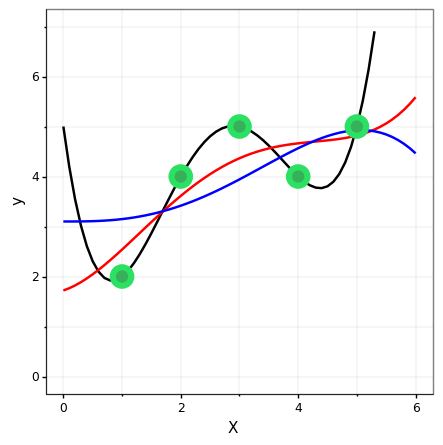

<ggplot: (-9223363256023612714)>

In [21]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

Here I was just playing around with `lambd` coeffiient for Ridge regression. Let's see where this led me:

In [22]:
# Ridge regression (L2)
lr_ridge_01 = Ridge(0.1)
lr_ridge_05 = Ridge(0.5)
lr_ridge_08 = Ridge(0.8)
lr_ridge_1 = Ridge(1)
lr_ridge_1000 = Ridge(1000)

# Train each one of these models on example_data
lr_ridge_01.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_05.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_08.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_1.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_1000.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Test each one of these models on test_data for visualisation purposes
test_data['lr_ridge_01_y'] = lr_ridge_01.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_05_y'] = lr_ridge_05.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_08_y'] = lr_ridge_08.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_1_y'] = lr_ridge_1.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
test_data['lr_ridge_1000_y'] = lr_ridge_1000.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])

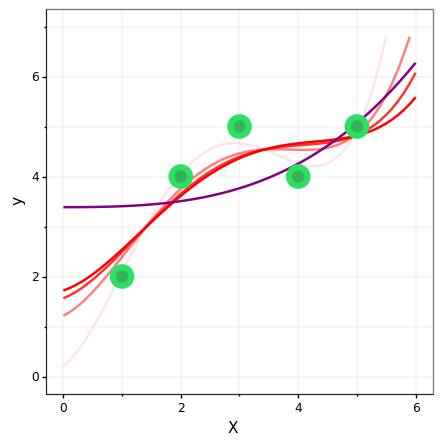

<ggplot: (8780831161671)>

In [23]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_01_y'), size = 1, colour = 'red', alpha = 0.1) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_05_y'), size = 1, colour = 'red', alpha = 0.5) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_08_y'), size = 1, colour = 'red', alpha = 0.8) +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_1_y'), size = 1, colour = 'red', alpha = 1) +
       geom_path(data =   test_data, mapping = aes(x = 'x', y = 'lr_ridge_1000_y'), size = 1, colour = 'purple', alpha = 1) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

In [24]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression(0.1): [{lr_ridge_01.coef_}, {round(lr_ridge_01.intercept_[0], 8)}]')
print(f'Ridge regression(0.5), acts as a feature selection: [{lr_ridge_05.coef_}, {round(lr_ridge_05.intercept_[0], 8)}]')
print(f'Ridge regression(0.8), acts as a feature selection: [{lr_ridge_08.coef_}, {round(lr_ridge_08.intercept_[0], 8)}]')
print(f'Ridge regression(1.0), acts as a feature selection: [{lr_ridge_1.coef_}, {round(lr_ridge_1.intercept_[0], 8)}]')
print(f'Ridge regression(1000), acts as a feature selection: [{lr_ridge_1000.coef_}, {round(lr_ridge_1000.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression(0.1): [[[ 0.91918473  1.56762301 -0.67997714  0.07350262]], 0.20575024]
Ridge regression(0.5), acts as a feature selection: [[[ 0.57826166  0.91934053 -0.3591395   0.03625419]], 1.21517709]
Ridge regression(0.8), acts as a feature selection: [[[ 0.44679205  0.71038556 -0.25332825  0.02390007]], 1.56552074]
Ridge regression(1.0), acts as a feature selection: [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Ridge regression(1000), acts as a feature selection: [[[0.0019322  0.00594611 0.01132294 0.0001677 ]], 3.38642867]


Optimal value for `lambda` term should be found via cross-validation algorithm.

## Homework Exercise 1 (3 points): ElasticNet algorithm combines both Ridge and LASSO regression.
<font color='red'> In the class we discussed Ridge and Lasso regression algorithms, which are basically, L2 and L1 regularisation applied to Linear Regression model. ElasticNet is a method that combines both L2 and L1 regularisation under one model. ElasticNet adds both L2 and L1 norms to the error function. Here you should train and visualise ElasticNet model on the toy dataset. </font>

<font color='red'> **(a)** Train ElasticNet from `sklearn` on example data. Test it on our artificial test data. **(1 points)**. </font>


In [25]:
from sklearn.linear_model import ElasticNet

# Regularization strength
lambd = 1

##### YOUR CODE STARTS #####

# Initialise ElasticNet regression (L1/L2)
lr_elastic = ElasticNet()

# Fit ElasticNet to our example_data
lr_elastic.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Test it on test set (re-run test set generation if needed)
test_data['lr_elastic_y'] = lr_lasso.predict(test_data[['x', 'x^2', 'x^3', 'x^4']])
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'> **(b)** Visualise all four regression trends (baseline, LASSO, Ridge and ElasticNet) on the same figure. Highlight ElasticNet in <font color='#F1C40F'>yellow</font>. **(1 points)**. </font>


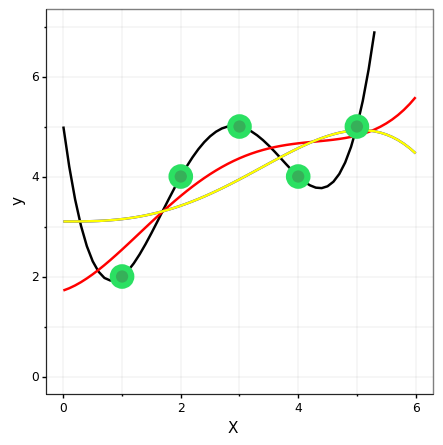

<ggplot: (8780831138915)>

In [26]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       ##### YOUR CODE STARTS #####
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
       geom_path(data = test_data, mapping = aes(x = 'x', y = 'lr_elastic_y'), size = 1, colour = 'yellow') +
       
       
       ##### YOUR CODE ENDS ##### (please do not delete this line)
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig


<font color='red'> **(c)** Print out ElasticNet coefficients, compare it to coefficients of other regressions, which one ElasticNet seems to be more similar to? Which parameter in `sklearn.ElasticNet` is responsible for the difference between Ridge and LASSO? **(1 points)**. </font>

In [27]:
##### YOUR CODE STARTS #####
print(lr_elastic)
print('Lasso:', lr_lasso.coef_)
print('Ridge:', lr_ridge.coef_)
print('Elastic:', lr_elastic.coef_)

##### YOUR CODE ENDS ##### (please do not delete this line)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Lasso: [ 0.          0.          0.05608653 -0.00829621]
Ridge: [[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]]
Elastic: [ 0.          0.          0.07844547 -0.01265445]


<font color='red'> Your textual answer goes here: </font>

Which one ElasticNet seems to be more similar to ?

- *It is more similar to Lasso*

Which parameter in `sklearn.ElasticNet` is responsible for the difference between Ridge and LASSO?

- *It is `alpha`*


## Homework exercise 2 (4 points):

<font color='red'> Implement basic linear regression and Ridge regression using the closed form solutions (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution). Run your implementations on the following synthetic dataset. Compare model coefficients to coefficients produced by `sklearn` functions `LinearRegression` and `Ridge`. Speculate about the difference in coefficients that you observe. </font>

In [28]:
# here we generate a synthetic dataset:
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=4,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

<font color='red'> **(a)** Implement closed form solutions for both baseline linear regression and ridge regression (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution) on the synthetic dataset: **(3 points)**. </font>



Let's minimize $||y - X w||^2 + \lambda ||w||^2 \rightarrow min$ to find solution to Ridge Regression

$f(w) = (y - X w)^T (y - X w) + \lambda w^T w = y^T y - 2 w^T X^T + w^T X^T X w$

$f'(w) = 2 X^T X w - 2 X^T y + 2 \lambda w = 0$


$w = (X^T X + \lambda)^{-1} X^T y$

In [29]:
n, m = X.shape
I = np.identity(m)
lambd = 1

##### YOUR CODE STARTS #####
Xc = np.hstack((np.ones((n, 1)), X))

# Implement baseline linear regression (closed form solution)
w_lr = np.linalg.inv(Xc.T @ Xc) @ Xc.T @ y
lr_coef = w_lr[1:]
lr_intercept = w_lr[0] 

# Implement Ridge regression (closed form solution)
w_ridge = np.linalg.inv(Xc.T @ Xc + lambd * np.identity(Xc.shape[1])) @ Xc.T @ y
lr_ridge_coef = w_ridge[1:]
lr_rigde_intercept = w_ridge[0]

##### YOUR CODE ENDS ##### (please do not delete this line)

In [30]:
# Initialise Linear Regression model from sklearn: 
lr = LinearRegression()
lr.fit(X, y)

# Initialise  Ridge regression (L2) model from sklearn:
lr_ridge = Ridge(lambd, solver='cholesky')
lr_ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

<font color='red'> **(b)** Compare coefficients you obtained using closed form solution and sklearn implementations. Comment on the difference you observe. **(1 point)**. </font>



In [31]:
##### YOUR CODE STARTS #####
print(lr_intercept, lr_coef)
print(lr.intercept_, lr.coef_)

print(lr_rigde_intercept, lr_ridge_coef)
print(lr_ridge.intercept_, lr_ridge.coef_)

##### YOUR CODE ENDS ##### (please do not delete this line)

-0.21031847531205816 [86.7933953   0.12444455  0.699363   -1.78601527]
-0.21031847531200132 [86.7933953   0.12444455  0.699363   -1.78601527]
0.14585751989681184 [84.52051208 -0.59234682  0.22594056 -2.22910111]
0.14955471081851357 [84.51986709 -0.59219469  0.22580939 -2.23109663]


<font color='red'>Your textual answer explaining the difference between coefficients goes here:</font>

Linear Regression weights are actualy the same.

Ridge regression weights has some tiny difference, but it is because sklearn uses iterative approximation of weights

# L2 and L1 regularization as weight decay in the Neural Networks

## Back to CIFAR10


In [38]:
!pip3 install --upgrade tensorflow

    100% |################################| 109.2MB 19kB/s eta 0:00:011   14% |####                            | 15.3MB 44.7MB/s eta 0:00:03
Requirement already up-to-date: six>=1.10.0 in /home/ikachko/.vcub/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: keras-applications>=1.0.6 in /home/ikachko/.vcub/lib/python3.6/site-packages (from tensorflow)
    100% |################################| 3.2MB 526kB/s ta 0:00:011
Requirement already up-to-date: protobuf>=3.6.1 in /home/ikachko/.vcub/lib/python3.6/site-packages (from tensorflow)
    100% |################################| 20.2MB 99kB/s eta 0:00:011
    100% |################################| 19.5MB 106kB/s eta 0:00:01
    100% |################################| 61kB 5.8MB/s eta 0:00:01
Requirement already up-to-date: keras-preprocessing>=1.0.5 in /home/ikachko/.vcub/lib/python3.6/site-packages (from tensorflow)
    100% |################################| 112kB 5.6MB/s eta 0:00:01
    100% |#############

In [32]:
# old school TF
# %tensorflow_version 1.x

# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [109]:
# Auxiliary function for plotting performance curves (loss and accuracy)
def plot_curves(history):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')

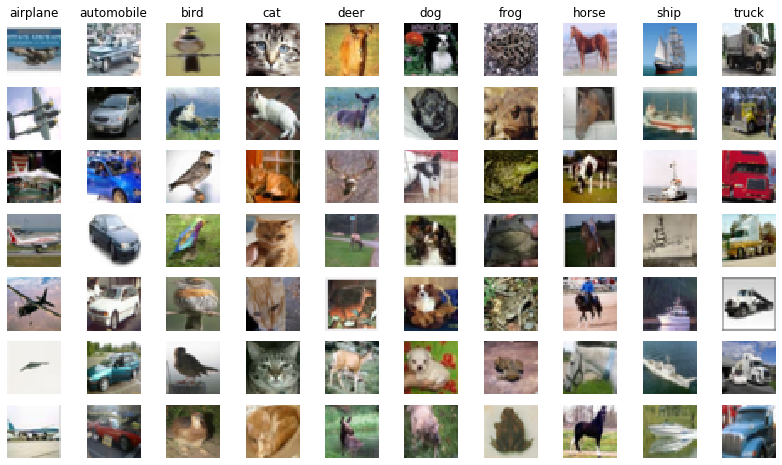

In [34]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
# "Names" of classes:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((32, 32, 3)), plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [35]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std


What if we use L2 regularisation or in other words weight decay (don't confuse with learning rate decay, these are different things)

In [73]:
# old school TF
# %tensorflow_version 1.x
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers
from keras import optimizers
from keras import Sequential
from keras.utils import multi_gpu_model
import tensorflow as tf

def define_model(lambd):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd), input_shape=(32, 32, 3)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambd)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
    
        
  try:
      model = multi_gpu_model(model)
  except:
      pass

  return(model)

By setting `lambd` to 0 we effectively use no weight decay. Let's see what our network is capable of without L2 regularisation.

In [50]:

# lambd = 0 to indicate no regularisation
model = define_model(lambd = 0)

# we can use sparse categorical crossentropy since our classes are mutually exclusive
# also we don't need to turn labels into the categorical one-hot coded variable  
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_37_input (InputLayer)    (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
lambda_13 (Lambda)              (None, 32, 32, 3)    0           conv2d_37_input[0][0]            
__________________________________________________________________________________________________
lambda_14 (Lambda)              (None, 32, 32, 3)    0           conv2d_37_input[0][0]            
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 10)           309290      lambda_13[0][0]                  
                                                                 lambda_14[0][0]            

In [40]:
# As last time we fit the model
# fit function returns History object, which keeps record of all losses and accuracies that we can plot later
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 12s 616us/step - loss: 2.0442 - accuracy: 0.3914 - val_loss: 1.3618 - val_accuracy: 0.5452
Epoch 2/20
20000/20000 [==============================] - 8s 414us/step - loss: 1.3967 - accuracy: 0.5382 - val_loss: 1.1012 - val_accuracy: 0.6276
Epoch 3/20
20000/20000 [==============================] - 8s 415us/step - loss: 1.1545 - accuracy: 0.6064 - val_loss: 0.9195 - val_accuracy: 0.6806
Epoch 4/20
20000/20000 [==============================] - 8s 412us/step - loss: 1.0010 - accuracy: 0.6541 - val_loss: 0.9235 - val_accuracy: 0.6820
Epoch 5/20
20000/20000 [==============================] - 8s 412us/step - loss: 0.9131 - accuracy: 0.6874 - val_loss: 0.8708 - val_accuracy: 0.7072
Epoch 6/20
20000/20000 [==============================] - 8s 413us/step - loss: 0.8344 - accuracy: 0.7126 - val_los

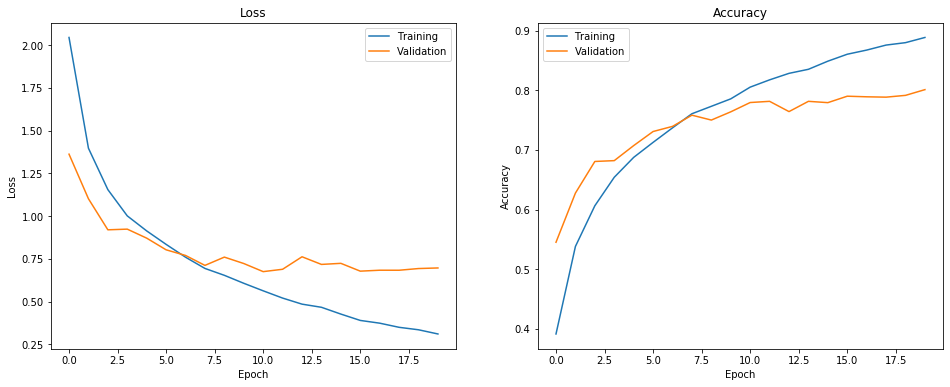

In [41]:
# plot the trajectories
plot_curves(history)

In [42]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 2s 246us/step


[0.7245372733831406, 0.7894999980926514]

Now let's add some (0.0001) **L2** regularisation to our model

In [44]:
# Adding the L2 regularisation:
model = define_model(0.0001)

try:
    model = multi_gpu_model(model)
except:
    pass

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

Train again

In [45]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 10s 484us/step - loss: 2.1356 - accuracy: 0.3758 - val_loss: 1.5053 - val_accuracy: 0.5064
Epoch 2/20
20000/20000 [==============================] - 8s 421us/step - loss: 1.4749 - accuracy: 0.5267 - val_loss: 1.1881 - val_accuracy: 0.6024
Epoch 3/20
20000/20000 [==============================] - 8s 422us/step - loss: 1.2153 - accuracy: 0.6001 - val_loss: 1.1193 - val_accuracy: 0.6332
Epoch 4/20
20000/20000 [==============================] - 8s 422us/step - loss: 1.0657 - accuracy: 0.6505 - val_loss: 0.9937 - val_accuracy: 0.6804
Epoch 5/20
20000/20000 [==============================] - 8s 421us/step - loss: 0.9624 - accuracy: 0.6836 - val_loss: 0.8574 - val_accuracy: 0.7176
Epoch 6/20
20000/20000 [==============================] - 8s 422us/step - loss: 0.8727 - accuracy: 0.7118 - val_loss: 0.9139 - val_accuracy: 0.7094
Epoch 7/20
20000/20000 [==============================] - 8s 4

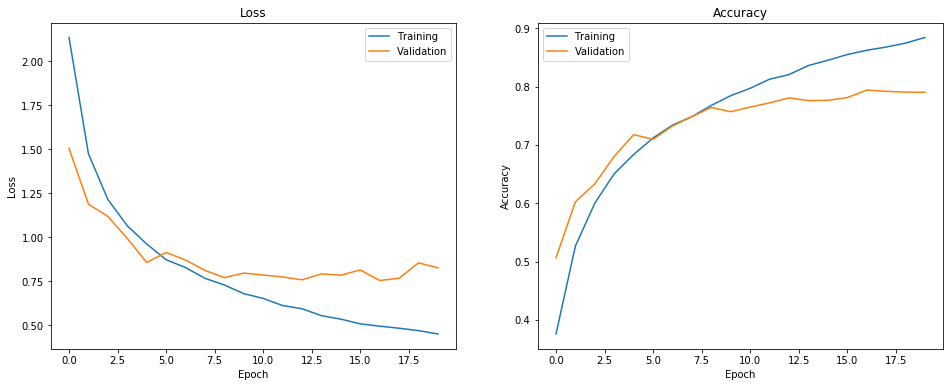

In [46]:
plot_curves(history)

In [55]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 4s 363us/step


[1.458866812133789, 0.5042999982833862]

## Homework exercise 3 (5 points): searching for lambda
<font color='red'> Adopt implementation of the cross-validation algorithm from the first practice session to find the best possible lambda for weight decay for the neural network we used in the class (that you call via `define_model`). </font>

<font color='red'> **(a)** Implement and run cross-validation by filling in the gaps. **(3 points)**. </font>


In [56]:
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1] # feel free to choose other values to loop over

# you can collect both accuracy and loss if you like, 
# but loss is influenced by the regularisation itself, so maybe less informative
val_fold_acc = np.zeros(len(lambdas))

for i,param in enumerate(lambdas):
    print(f'Validation loss for lambda = {param}...')
    ##### YOUR CODE STARTS #####
    # 4-fold cross validation
    # break training data into 4 equal chunks using np.concatenate and np.repeate functions

    # number of folds
    n_folds = 4 # feel free to change the number of folds, but make sure the rest of the code complies

    folds_indx =  np.repeat(np.arange(n_folds), X_train_norm.shape[0] // n_folds)

    # randomly shuffle the indeces
    np.random.shuffle(folds_indx)

    # initialise variable that will hold RMSEs for each fold
    fold_acc = [0] * n_folds

    for fold_indx in np.arange(n_folds):

        # split data into train_X, train_y and val_X, val_y depending on the fold:
        train_idxs = np.flatnonzero(folds_indx != fold_indx)
        val_idxs = np.flatnonzero(folds_indx == fold_indx)

        train_X = X_train_norm[train_idxs]
        train_y = y_train[train_idxs]

        val_X = X_train_norm[val_idxs]
        val_y = y_train[val_idxs]

        # train the neural network with lambda = param
        model = define_model(lambd=param)

        # compile the model
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

        # fit the neural network on training data
        # number of epochs is tricky, if you choose too little the performance will be unstable
        # if you choose too large, it will take ages to complete...
        model.fit(train_X, train_y, batch_size=64, epochs=6, validation_split=0.2)

        # calculate accuracy for this fold
        fold_acc[fold_indx] = model.evaluate(val_X, val_y)[1]
        ##### YOUR CODE ENDS ##### (please do not delete this line)

    print(f'Average validation accuracy for {param} is {np.mean(fold_acc)}')
    val_fold_acc[i] = np.mean(fold_acc)


Validation loss for lambda = 1e-06...
Train on 15000 samples, validate on 3750 samples
Epoch 1/6
15000/15000 [==============================] - 12s 768us/step - loss: 2.1606 - accuracy: 0.3613 - val_loss: 1.3901 - val_accuracy: 0.5013
Epoch 2/6
15000/15000 [==============================] - 8s 523us/step - loss: 1.5301 - accuracy: 0.4996 - val_loss: 1.1273 - val_accuracy: 0.6109
Epoch 3/6
15000/15000 [==============================] - 8s 522us/step - loss: 1.2499 - accuracy: 0.5786 - val_loss: 1.1139 - val_accuracy: 0.6179
Epoch 4/6
15000/15000 [==============================] - 8s 524us/step - loss: 1.0878 - accuracy: 0.6283 - val_loss: 1.0287 - val_accuracy: 0.6517
Epoch 5/6
15000/15000 [==============================] - 8s 524us/step - loss: 0.9742 - accuracy: 0.6637 - val_loss: 0.9255 - val_accuracy: 0.6925
Epoch 6/6
6250/6250 [==============================] - 2s 381us/step
Train on 15000 samples, validate on 3750 samples
Epoch 1/6
15000/15000 [==============================] - 12

In [57]:
val_fold_acc

array([0.70364   , 0.70432001, 0.69363999, 0.68516   , 0.63604002,
       0.44628   ])

<font color='red'> **(b)** Visualise train/validation accuracy/loss for different lambda values, report the best one. **(1 point)**. </font>


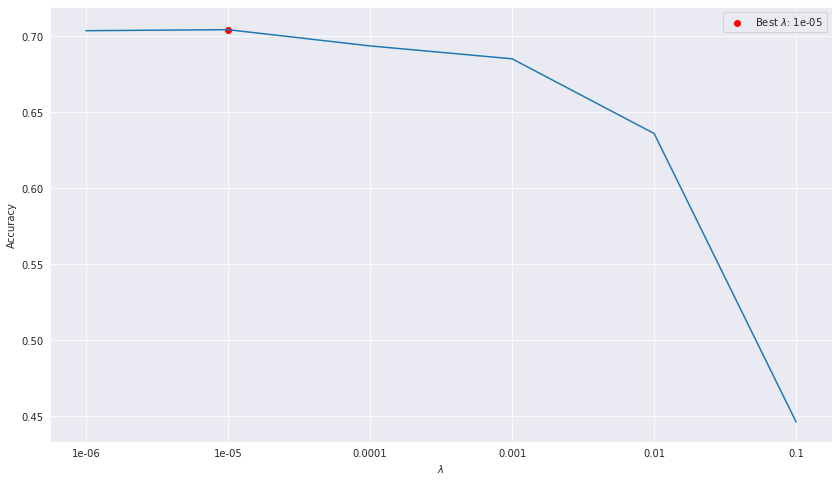

In [77]:
import seaborn as sns
sns.set_style('darkgrid')

##### YOUR CODE STARTS #####
best_lambda_idx = np.argmax(val_fold_acc)
log_lambdas = np.log10(lambdas)

sns.lineplot(log_lambdas, val_fold_acc)
plt.scatter([log_lambdas[best_lambda_idx]], [val_fold_acc[best_lambda_idx]], c='r', label='Best $\lambda$: {}'.format(str(lambdas[best_lambda_idx])))
plt.xticks(ticks=log_lambdas, labels=lambdas)
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')
plt.legend()
##### YOUR CODE ENDS ##### (please do not delete this line)
plt.show()

<font color='red'> **(c)** Re-train the network using the reported in the **(b)**, lambda value. Visualise performance curves and interpret the results. (if results did not improve, no need to re-run the process again, just comment on the results). **(1 point)**. </font>

In [64]:
##### YOUR CODE STARTS #####
# Define the model with found parameter lambda
model = define_model(lambd=0.00001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)
##### YOUR CODE ENDS ##### (please do not delete this line)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 18s 885us/step - loss: 2.0546 - accuracy: 0.3837 - val_loss: 1.4322 - val_accuracy: 0.5324
Epoch 2/20
20000/20000 [==============================] - 12s 599us/step - loss: 1.4405 - accuracy: 0.5250 - val_loss: 1.1140 - val_accuracy: 0.6144
Epoch 3/20
20000/20000 [==============================] - 12s 592us/step - loss: 1.1692 - accuracy: 0.6058 - val_loss: 1.0008 - val_accuracy: 0.6582
Epoch 4/20
20000/20000 [==============================] - 12s 601us/step - loss: 1.0075 - accuracy: 0.6561 - val_loss: 0.8396 - val_accuracy: 0.7164
Epoch 5/20
20000/20000 [==============================] - 12s 597us/step - loss: 0.8931 - accuracy: 0.6950 - val_loss: 0.8236 - val_accuracy: 0.7154
Epoch 6/20
20000/20000 [==============================] - 12s 594us/step - loss: 0.8199 - accuracy: 0.7153 - val_loss: 0.7673 - val_accuracy: 0.7426
Epoch 7/20
20000/20000 [==============================] -

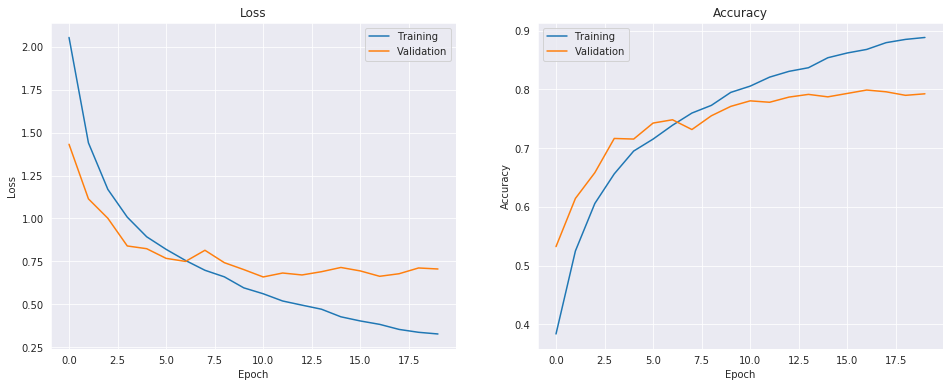

In [78]:
##### YOUR CODE STARTS #####
plot_curves(history)
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'> Your insightful interpretation of the results goes here: </font>

The results are just a slightly better than model that we used before reguralization test. As we can see from a lambda plot, higher regularization makes model to perform worse. And even with best lambda model overfits after 5 epochs

## Augmentation

As we discussed in the lecture, augmentation is one of the most simple, yet effective ways to improve generalisation of many machine learning models. Unfortunately, not all types of data can be easily augmented (e.g. tabular data, or some sounds). Here we look at image augmentation techniques using Keras builtin `ImageDataGenerator` class (https://keras.io/preprocessing/image/).

In [55]:
# %tensorflow_version 1.x

from keras.preprocessing.image import ImageDataGenerator

Let's load our CIFAR10 again.

In [114]:
# old school TF

# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


`ImageDataGenerator` is a framework that is used to apply a sereis of transformations (also knowns as augmentations) to the input images. Here is an example of simple augmentation pipeline using `ImageDataGenerator`:

In [115]:
datagen = ImageDataGenerator(rotation_range=90, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True) # horizontaly flip random 30% of images 

# assign augmentation pipeline to our data
datagen.fit(X_train)

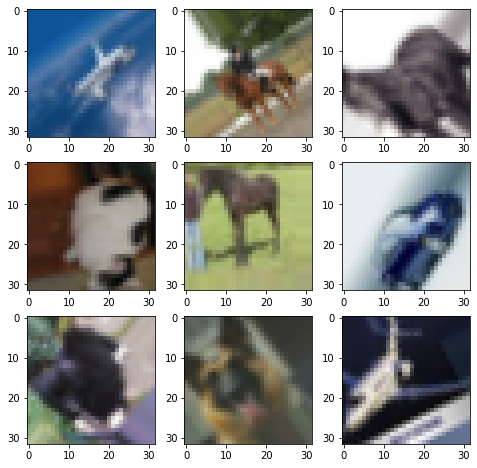

In [116]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8').reshape(32, 32, 3))
    # show the plot
    plt.show()
    break

Data generators in Keras do not have `validation_split` option for training. Why?
Here we create a separate validation set:

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 111, test_size = 0.10)

print(X_train.shape)
print(X_val.shape)

(22500, 32, 32, 3)
(2500, 32, 32, 3)


In [118]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_val_norm = (X_val - mu)/std
X_test_norm = (X_test - mu)/std

Let's use the same simple augmentation schema as we defined before, but instead of 0 to 90 degrees, limit random rotation range to 15 degrees: 

In [119]:
##### YOUR CODE STARTS #####

#data augmentation
datagen = ImageDataGenerator(rotation_range=15, # randomly rotate an image from 0 to 15 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True)

# assign augmentation schema to X_train_norm
datagen.fit(X_train_norm)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [120]:
# Create a model 
model = define_model(0.00001)

# Compile the model as before (code is identical)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# instead of using .fit() we use .fit_generator() 
# .fit_generator trains the model on a batch by batch basis
# each batch is created by datagen.flow function that we saw before
history = model.fit_generator(datagen.flow(X_train_norm, y_train, batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )


Epoch 1/25
351/351 [==============================] - 11s 33ms/step - loss: 2.1687 - accuracy: 0.3495 - val_loss: 1.4114 - val_accuracy: 0.5224
Epoch 2/25
351/351 [==============================] - 10s 28ms/step - loss: 1.5793 - accuracy: 0.4687 - val_loss: 1.3997 - val_accuracy: 0.5308
Epoch 3/25
351/351 [==============================] - 10s 28ms/step - loss: 1.3666 - accuracy: 0.5328 - val_loss: 1.2718 - val_accuracy: 0.5724
Epoch 4/25
351/351 [==============================] - 10s 29ms/step - loss: 1.2055 - accuracy: 0.5844 - val_loss: 1.2998 - val_accuracy: 0.5896
Epoch 5/25
351/351 [==============================] - 10s 28ms/step - loss: 1.1020 - accuracy: 0.6170 - val_loss: 0.8985 - val_accuracy: 0.6916
Epoch 6/25
351/351 [==============================] - 10s 28ms/step - loss: 1.0213 - accuracy: 0.6427 - val_loss: 0.9804 - val_accuracy: 0.6760
Epoch 7/25
351/351 [==============================] - 10s 29ms/step - loss: 0.9674 - accuracy: 0.6665 - val_loss: 0.9411 - val_accuracy:

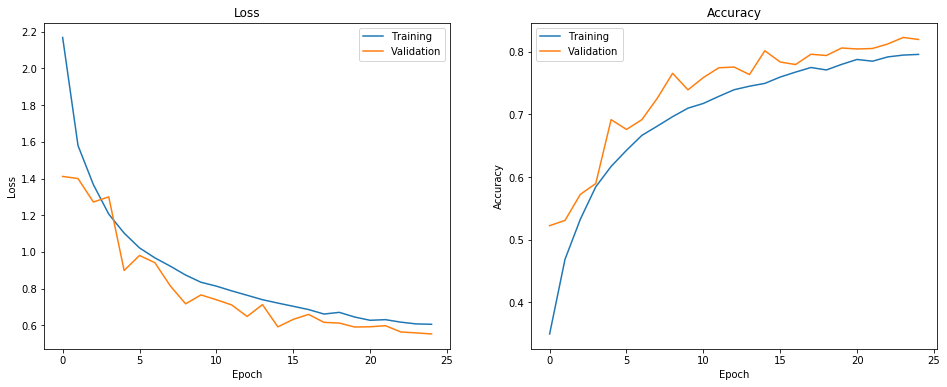

In [121]:
plot_curves(history)

In [122]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 3s 299us/step


[0.6069598773956298, 0.8008999824523926]

## Homework exercise 4 (3 points): applying more sophisticated augmentation pipelines
<font color='red'> Check https://keras.io/preprocessing/image/ and add more interesting transformation into the above pipeline. Train your network again, and interpret the results. </font>

<font color='red'> **(a)** Add at least 2-3 more different transformations described at https://keras.io/preprocessing/image/. Visualise these augmentations on CIFAR10 images (as we have done for the simple pipeline). Briefly explain your choise (why these augmentation you added will help). **(1 point)**. </font>


In [92]:
#data augmentation
datagen = ImageDataGenerator(
                rotation_range=45, # randomly rotate an image from 0 to 15 degrees
                width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                horizontal_flip=True,
                zoom_range=0.2, # Random zoom
                shear_range=0.2, # Shear angle in counter-clockwise direction in degrees
                
)

# assign augmentation schema to X_train_norm
datagen.fit(X_train_norm)

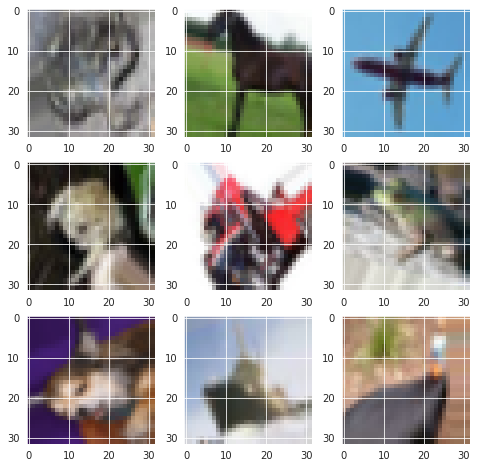

In [93]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8').reshape(32, 32, 3))
    # show the plot
    plt.show()
    break

<font color='red'> **(b)** Retrain the model using this new augmented training set, test this new model on the non-augmented test set data. **(1 point)**. </font>

In [94]:
# Create a model 
model = define_model(0.00001)

# Compile the model as before (code is identical)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# instead of using .fit() we use .fit_generator() 
# .fit_generator trains the model on a batch by batch basis
# each batch is created by datagen.flow function that we saw before
history = model.fit_generator(datagen.flow(X_train_norm, y_train, batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )

Epoch 1/25
351/351 [==============================] - 21s 59ms/step - loss: 2.3137 - accuracy: 0.3045 - val_loss: 1.6133 - val_accuracy: 0.4424
Epoch 2/25
351/351 [==============================] - 15s 41ms/step - loss: 1.7995 - accuracy: 0.3960 - val_loss: 1.4563 - val_accuracy: 0.4952
Epoch 3/25
351/351 [==============================] - 15s 42ms/step - loss: 1.6008 - accuracy: 0.4478 - val_loss: 1.3058 - val_accuracy: 0.5416
Epoch 4/25
351/351 [==============================] - 15s 42ms/step - loss: 1.4724 - accuracy: 0.4910 - val_loss: 1.3135 - val_accuracy: 0.5564
Epoch 5/25
351/351 [==============================] - 15s 42ms/step - loss: 1.3741 - accuracy: 0.5186 - val_loss: 1.2431 - val_accuracy: 0.5960
Epoch 6/25
351/351 [==============================] - 15s 42ms/step - loss: 1.2897 - accuracy: 0.5483 - val_loss: 1.1353 - val_accuracy: 0.6148
Epoch 7/25
351/351 [==============================] - 15s 43ms/step - loss: 1.2226 - accuracy: 0.5695 - val_loss: 1.0794 - val_accuracy:


<font color='red'> **(c)** Plot the performance curves (loss and accuracy) and interpret the results. Did the performance improve? Why? Why not? **(1 point)**. </font>

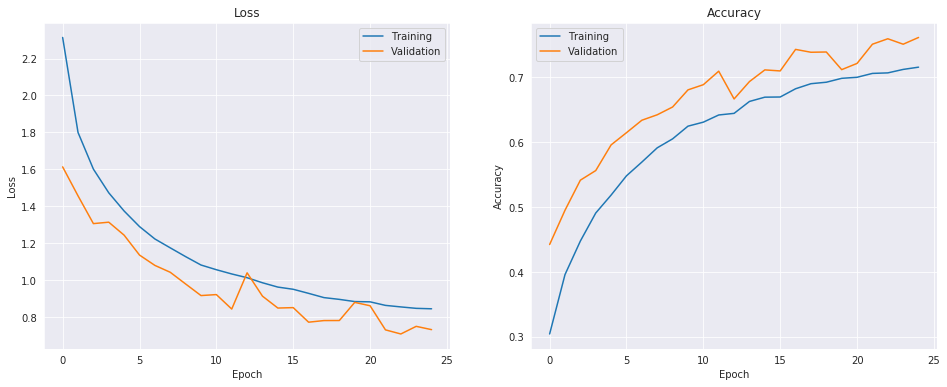

In [95]:
plot_curves(history)

Model now did not overfitted so early as it did before. So model performed much better, because broad class of augmentation helped model to generalize better

# Bonus exercises
*(NB, these are optional exercises!)*
 

## Bonus exercise 1 (up to 3 bonus points depending on presentation):

<font color='red'> Use last module's code for training a shallow Neural Network (below) and add weight decay (L2 regularisation) term into both feed-forward and backpropagation parts. Train the network on the same synthetic spiral dataset (as last time) and check if adding regularisation helps to obtain better score. Visualise the resulting classifier. (Feel free to reuse as much code from previous practice session as possible) </font>

Spiral dataset generation:

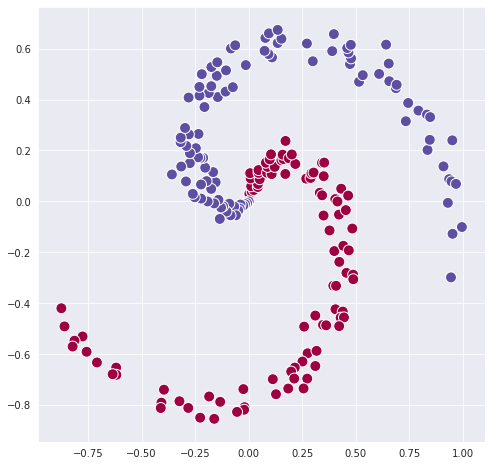

In [96]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes (purple and red circles)
X = np.zeros((N*K,D)) # data matrix (each row = single example)
num_examples = X.shape[0]
y = np.zeros(N*K, dtype='uint8') # class labels

# Adding some geometry
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.show()

Neural Network training code:

In [116]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

truth = np.zeros((len(y), D))
truth[np.arange(len(truth)), y] = 1

# some hyperparameters
step_size = 0.1
lambda_ = 0.01

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  ##### YOUR CODE STARTS #####

  # evaluate answers, [N x K]
  answers = np.dot(X, W) + b
  
  # compute the error: average sum of squared differences
  total_error = 1/2 * np.sum((truth - answers)**2) + 1/2 * lambda_ * np.sum(W**2) # Add L2 to forward-prop
  total_error = total_error/num_examples

  if i % 10 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on answers
  dTEdA = (truth - answers)*(-1)
  dTEdA = dTEdA/num_examples

  # compute the gradient on weights and biases
  dAdW = X.T
  dAdb = 1

  # complete backpropatation path to the parameters (W,b) and add L2
  dW = np.dot(dAdW, dTEdA) + lambda_ * W
  db = np.sum(dTEdA, axis=0, keepdims=True) + lambda_ * b
  
  # perform a parameter update
  W = W - step_size*dW
  b = b - step_size*db 
  ##### YOUR CODE ENDS ##### (please do not delete this line)

iteration 0: loss 5.013568e-01
iteration 10: loss 2.490398e-01
iteration 20: loss 2.004072e-01
iteration 30: loss 1.812940e-01
iteration 40: loss 1.696168e-01
iteration 50: loss 1.615402e-01
iteration 60: loss 1.557744e-01
iteration 70: loss 1.516011e-01
iteration 80: loss 1.485485e-01
iteration 90: loss 1.462937e-01
iteration 100: loss 1.446120e-01
iteration 110: loss 1.433461e-01
iteration 120: loss 1.423842e-01
iteration 130: loss 1.416468e-01
iteration 140: loss 1.410766e-01
iteration 150: loss 1.406320e-01
iteration 160: loss 1.402826e-01
iteration 170: loss 1.400060e-01
iteration 180: loss 1.397854e-01
iteration 190: loss 1.396083e-01


## Bonus exercise 2 (up to 4 bonus points depending on presentation):

<font color='red'> Do ANYTHING (still morally acceptible) to obtain as high accuracy on CIFAR10 test set as possible. Can you get up to 90%? Describe your approach in details, including code (document your approach below). Aim at making your code readable, as well as approach elegant and concise. If you use someone else's code (no problem, but) refence it properly. </font>

This is a famous model ResNet, that on the moment it was released was SOTA in Cifar10 classification. https://keras.io/examples/cifar10_resnet/

Beside deep ResNet model, that has good generalization properties on images, some tricks was used to improve its accuracy:

1) Data Augmentation:
 - ZCA whitening
 - Random horizontal shift
 - Random height shift
 - Random horizontal flip

2) Learning Rate Tricks

When model can't optimize on some moment there is always a possibility, that learning rate is too high to reach optimum. So I used 2 tricks to handle that:

- Learning Rate Scheduler (change learning rate on some epoch)
- ReduceLROnPlateau (keras function, that reduces learning rate if training reached plateau

In [123]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [124]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [125]:
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]


datagen = ImageDataGenerator(
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
)
datagen.fit(x_train)

In [ ]:
model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()


# Training parameters
batch_size = 32
epochs = 100

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                        callbacks=callbacks)

Learning rate:  0.001
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 32, 32, 16)   448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_62 (BatchNo (None, 32, 32, 16)   64          conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_62 (Activation)      (None, 32, 32, 16)   0           batch_normalization_62[0][0]     
______________________________________________________________________

## Bonus exercise 3 (up to 4 bonus points depending on presentation):
<font color='red'> Experimentally verify if CutMix augmentation helps to improve the test score on CIFAR10 (not clear, as images are very tiny). Link to the CutMix paper: https://arxiv.org/abs/1905.04899. Show couple of examples of CutMix augmented images and your implementation along with performance curves and scores. </font>


In [75]:
# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [37]:
import random
import numpy as np

# This is a CutMix implementation from cutmix-keras (https://pypi.org/project/cutmix-keras/)
# But I modified it a little bit, because it has some issues

class CutMixImageDataGenerator():
    def __init__(self, generator1, generator2, img_size, batch_size):
        self.batch_index = 0
        self.samples = generator1.n
        self.generator1 = generator1
        self.generator2 = generator2
        self.img_size = img_size
        self.batch_size = batch_size

    def reset_index(self):  # Ordering Reset (If Shuffle is True, Shuffle Again)
        self.generator1._set_index_array()
        self.generator2._set_index_array()

    def reset(self):
        self.batch_index = 0
        self.generator1.reset()
        self.generator2.reset()
        self.reset_index()

    def get_steps_per_epoch(self):
        quotient, remainder = divmod(self.samples, self.batch_size)
        return (quotient + 1) if remainder else quotient
    
    def __len__(self):
        self.get_steps_per_epoch()

    def __next__(self):
        if self.batch_index == 0: self.reset()

        crt_idx = self.batch_index * self.batch_size
        if self.samples > crt_idx + self.batch_size:
            self.batch_index += 1
        else:  # If current index over number of samples
            self.batch_index = 0

        reshape_size = self.batch_size
        last_step_start_idx = (self.get_steps_per_epoch()-1) * self.batch_size
        if crt_idx == last_step_start_idx:
            reshape_size = self.samples - last_step_start_idx
            
        X_1, y_1 = self.generator1.next()
        X_2, y_2 = self.generator2.next()
        
        cut_ratio = np.random.beta(a=1, b=1, size=reshape_size)
        cut_ratio = np.clip(cut_ratio, 0.2, 0.8)
        label_ratio = cut_ratio.reshape(reshape_size, 1)
        cut_img = X_2

        X = X_1
        for i in range(reshape_size):
            cut_size = int((self.img_size-1) * cut_ratio[i])
            y1 = random.randint(0, (self.img_size-1) - cut_size)
            x1 = random.randint(0, (self.img_size-1) - cut_size)
            y2 = y1 + cut_size
            x2 = x1 + cut_size
            cut_arr = cut_img[i][y1:y2, x1:x2]
            cutmix_img = X_1[i]
            cutmix_img[y1:y2, x1:x2] = cut_arr
            X[i] = cutmix_img
            
        y = y_1 * (1 - (label_ratio ** 2)) + y_2 * (label_ratio ** 2)
        return X, y

    def __iter__(self):
        while True:
            yield next(self)

In [103]:
#data augmentation
datagen = ImageDataGenerator(rotation_range=15, # randomly rotate an image from 0 to 15 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True)

train_generator_1 = datagen.flow(
    x_train,
    y_train,
    batch_size=64,
    shuffle=True)

train_generator_2 = datagen.flow(
    x_train,
    y_train,
    batch_size=64,
    shuffle=True
)

# assign augmentation schema to X_train_norm
train_generator = CutMixImageDataGenerator(
    generator1=train_generator_1,
    generator2=train_generator_2,
    img_size=input_shape[0],
    batch_size=64,
)

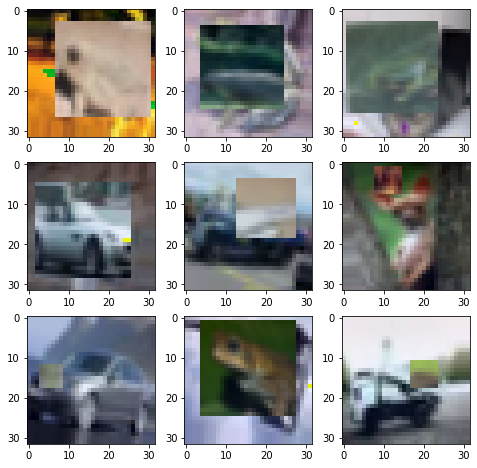

In [105]:
from matplotlib import pyplot as plt

X, y = train_generator.__next__()

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for i in range(0, 9):
    plt.subplot(3, 3, 1 + i)
    img = X[i]
    img = (img - img.min()) * 255
    plt.imshow(img.astype('uint8'))
# show the plot
plt.show()

In [106]:
# assign augmentation schema to X_train_norm
train_generator = CutMixImageDataGenerator(
    generator1=train_generator_1,
    generator2=train_generator_2,
    img_size=input_shape[0],
    batch_size=64,
)

In [107]:
# Create a model 
model = define_model(0.00001)

# Compile the model as before (code is identical)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# instead of using .fit() we use .fit_generator() 
# .fit_generator trains the model on a batch by batch basis
# each batch is created by datagen.flow function that we saw before
history = model.fit_generator(
                    generator=train_generator,
                    steps_per_epoch=train_generator.get_steps_per_epoch(),
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,y_test)
                    )


Epoch 1/50
782/782 [==============================] - 41s 52ms/step - loss: 2.3158 - accuracy: 0.2848 - val_loss: 1.3982 - val_accuracy: 0.5079
Epoch 2/50
782/782 [==============================] - 39s 50ms/step - loss: 1.8426 - accuracy: 0.4070 - val_loss: 1.2247 - val_accuracy: 0.5795
Epoch 3/50
782/782 [==============================] - 39s 50ms/step - loss: 1.6986 - accuracy: 0.4725 - val_loss: 1.0675 - val_accuracy: 0.6324
Epoch 4/50
782/782 [==============================] - 39s 50ms/step - loss: 1.6210 - accuracy: 0.5116 - val_loss: 0.9660 - val_accuracy: 0.6683
Epoch 5/50
782/782 [==============================] - 39s 50ms/step - loss: 1.5675 - accuracy: 0.5402 - val_loss: 0.8786 - val_accuracy: 0.7042
Epoch 6/50
782/782 [==============================] - 39s 50ms/step - loss: 1.5348 - accuracy: 0.5592 - val_loss: 0.8722 - val_accuracy: 0.7079
Epoch 7/50
782/782 [==============================] - 39s 50ms/step - loss: 1.4997 - accuracy: 0.5746 - val_loss: 0.8849 - val_accuracy:

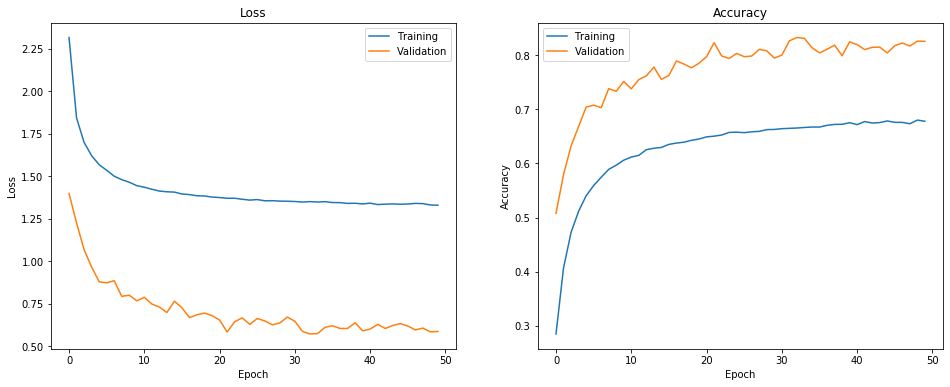

In [110]:
plot_curves(history)

I can verify, that CutMix increase test score on CIFAR10. This augmentation helps model not to focus on certain features but look at all image. Because of this image disruption we have low accuracy on a train set. But model performs better on a unseen images

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?

About 2 days (most of the time was model training)

* was it too hard/easy for you?

Not too easy, not too hard

* what would you suggest to add or remove?

Nothing. Everything is fine

* anything else you would like to tell us

I've learned a lot about Keras and its tricks to train it better